In [51]:
import pandas as pd
import numpy as np

In [52]:
boston_reviews = pd.read_csv('boston/reviews.csv')

In [53]:
boston_reviews 

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [54]:
boston_listings = pd.read_csv('boston/listings.csv')

In [55]:
boston_listings.head()
boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [71]:
#how many unique values are there for host_is_superhost?
boston_listings['host_is_superhost'].unique()

array(['f', 't'], dtype=object)

In [72]:
#how to find the count for each unique value in a column?
boston_listings['host_is_superhost'].value_counts()

f    3178
t     407
Name: host_is_superhost, dtype: int64

In [78]:
boston_listings_superhost = 407/3178
boston_listings_superhost

0.12806796727501574

In [56]:
#how to get rid of dollar sign in price for boston_listings
boston_listings['price'] = boston_listings['price'].str.replace('$', '')
boston_listings['price']

/var/folders/xh/hfqxf1xx32b_wlmnwcqbn8400000gn/T/ipykernel_75260/2727752574.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  boston_listings['price'] = boston_listings['price'].str.replace('$', '')


0       250.00
1        65.00
2        65.00
3        75.00
4        79.00
         ...  
3580     69.00
3581    150.00
3582    198.00
3583     65.00
3584     65.00
Name: price, Length: 3585, dtype: object

In [57]:
#how to remove comma in price for boston_listings
boston_listings['price'] = boston_listings['price'].str.replace(',', '')

In [58]:
#how to convert price to float for boston_listings
boston_listings['price'] = boston_listings['price'].astype(float)

In [59]:
#find average price for boston_listings
boston_listings['price'].mean()

173.9258019525802

In [60]:
seattle_listings = pd.read_csv('seattle/listings.csv')

In [63]:
seattle_listings['price'] = seattle_listings['price'].str.replace(',', '')

In [64]:
seattle_listings['price'] = seattle_listings['price'].str.replace('$', '')

/var/folders/xh/hfqxf1xx32b_wlmnwcqbn8400000gn/T/ipykernel_75260/2730390150.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  seattle_listings['price'] = seattle_listings['price'].str.replace('$', '')


In [66]:
seattle_listings['price'] = seattle_listings['price'].astype(float)

In [67]:
seattle_listings['price'].mean()

127.97616553169199

In [73]:
seattle_listings['host_is_superhost'].value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [79]:
#how to divide two values
seattle_listings_superhost = 778/3038
seattle_listings_superhost

0.25608953258722844

In [94]:
#how to find positive or negative reviews based on comments
boston_reviews['comments'].str.contains('good|great').value_counts()

False    37072
True     31150
Name: comments, dtype: int64

In [93]:
seattle_reviews['comments'].str.contains('good|great').value_counts()

True     43002
False    41829
Name: comments, dtype: int64

In [95]:
seattle_reviews_comments = 43002/41829
seattle_reviews_comments

1.0280427454636736

In [96]:
boston_reviews_comments = 31150/37072
boston_reviews_comments

0.8402567975830816

In [ ]:
boston_reviews  = pd.read_csv('boston/reviews.csv')

In [101]:
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [ ]:
seattle_reviews = pd.read_csv('seattle/reviews.csv')

In [100]:
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
seattle_listings = pd.read_csv('seattle/listings.csv')

In [98]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
seattle_calendar = pd.read_csv('seattle/calendar.csv')

In [99]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [97]:
seattle_calendar['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [102]:
#how to find the percentage of true vs false for available column in seattle_calendar
seattle_calendar_available = 934542/1393570

In [103]:
seattle_calendar_available

0.6706100160020666

In [104]:
boston_calendar = pd.read_csv('boston/calendar.csv')

In [105]:
boston_calendar['available'].value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [106]:
#how to find the percentage of true vs false for available column in boston_calendar
boston_calendar_available = 643037/1308890


In [107]:
boston_calendar_available

0.4912842179251121

In [108]:
#how to plot a box plot between boston and seattle prices
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
boston_listings.city

0           Boston
1           Boston
2           Boston
3           Boston
4           Boston
           ...    
3580    Somerville
3581     Brookline
3582     Cambridge
3583    Somerville
3584    Somerville
Name: city, Length: 3585, dtype: object

In [115]:
#how to replace entire column with a value for city in boston_listings
boston_listings['city'] = 'Boston'

In [123]:
seattle_listings['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [117]:
seattle_listings['city'] = 'Seattle'

In [158]:
#unique values in a certain column
mdf['price'].unique()

array(['id', 'scrape_id', 'host_id', 'host_about', 'host_listings_count',
       'host_total_listings_count', 'zipcode', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'price', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype=object)

In [159]:
df_combine_prices = pd.concat([boston_listings.price.rename("boston_prices"),seattle_listings.price.rename("seattle_prices")], axis=1)


<AxesSubplot:title={'center':'Seattle vs Boston Airbnb Price Comparison'}, xlabel='City', ylabel='Price in $'>

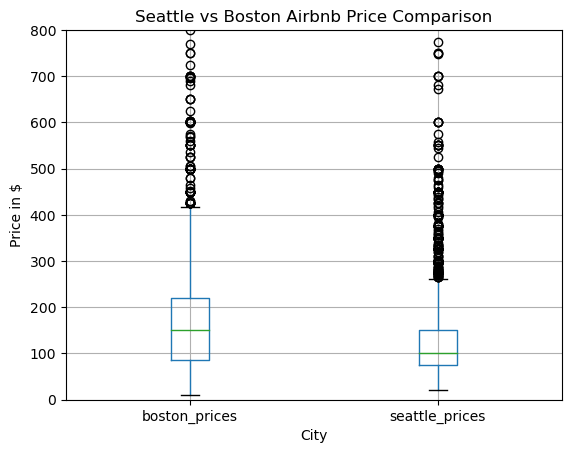

In [162]:
plt.ylim(0,800)
plt.title('Seattle vs Boston Airbnb Price Comparison')
plt.ylabel('Price in $')
plt.xlabel('City')
df_combine_prices.boxplot()

<AxesSubplot:>

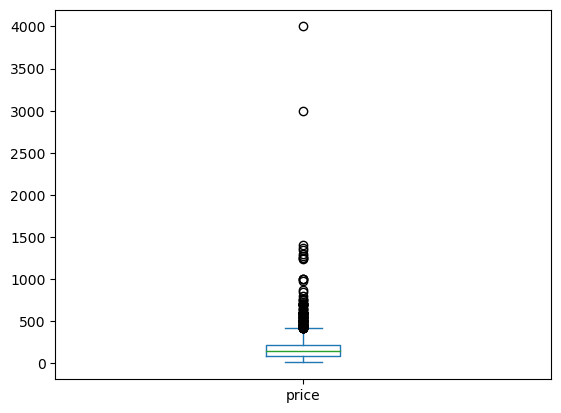

In [153]:
boston_listings['price'].plot(kind='box')

<AxesSubplot:>

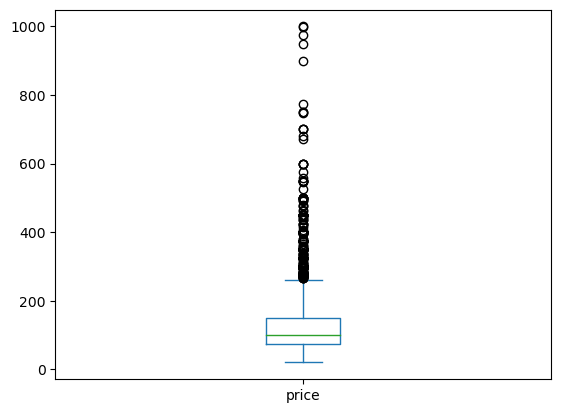

In [154]:
seattle_listings['price'].plot(kind='box')

In [127]:
cdf = pd.concat([boston_listings, seattle_listings])
mdf = pd.melt(cdf, id_vars=['city'], var_name=['price'])
print(mdf.head())

     city price     value
0  Boston    id  12147973
1  Boston    id   3075044
2  Boston    id      6976
3  Boston    id   1436513
4  Boston    id   7651065


In [137]:
#how to convert mdf['value'] to float
mdf['value'] = pd.to_numeric(mdf['value'])
type(mdf['value'])

pandas.core.series.Series

In [151]:
mdf['city'].plot(kind='box', by='price')

AttributeError: 'BoxPlot' object has no attribute 'columns'

In [146]:
mdf['value']

0         12147973.0
1          3075044.0
2             6976.0
3          1436513.0
4          7651065.0
             ...    
695877           0.3
695878           2.0
695879           NaN
695880           NaN
695881           NaN
Name: value, Length: 695882, dtype: float64

In [147]:
#remove missing values for mdf['value']
mdf = mdf.dropna(subset=['value'])

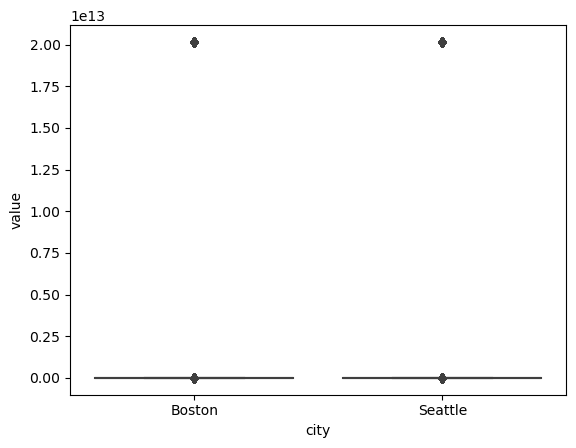

In [148]:
ax = sns.boxplot(x="city", y="value", data=mdf)    
plt.show()

In [149]:
#how to plot a box plot between boston and seattle prices
plt.figure(figsize=(10, 8))
sns.boxplot(x='city', y='price', data=pd.concat([boston_listings['price'], seattle_listings['price']], keys=['Boston', 'Seattle'], axis=1))

ValueError: Could not interpret input 'city'

<Figure size 1000x800 with 0 Axes>

In [126]:
#how to plot a box and whisker plot between boston and seattle prices
plt.figure(figsize=(10, 8))
sns.boxplot(x='city', y='price', data=pd.concat([boston_listings['price'], seattle_listings['price']], keys=['Boston', 'Seattle'], axis=1), showfliers=False)

ValueError: Could not interpret input 'city'

<Figure size 1000x800 with 0 Axes>

In [ ]:
df2 = pd.read_csv('neighbourhoods.csv')
print(df2.head())

   neighbourhood_group             neighbourhood
0                  NaN             Coconut Creek
1                  NaN               Cooper City
2                  NaN             Coral Springs
3                  NaN  County Regional Facility
4                  NaN               Dania Beach


In [ ]:
#print columns of df2
print(df2.columns)

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')


In [ ]:
df3 = pd.read_csv('listings.csv')
print(df3.head())

       id                                 name  host_id  \
0   83449        MARY POP APTS 2/1 APT SLEEP 5   454736   
1   69824            2 bd/2ba Oceanfront Condo   351303   
2  191160   Tropical Beach Paradise Awaits You   924482   
3  129099  MIAMI - AMAZING APARTMENT OCEANVIEW   637272   
4  129061  MIAMI - LUXURY APARTMENT OVER BEACH   637272   

                   host_name  neighbourhood_group     neighbourhood  latitude  \
0  Jon,  Mary Pop Apartments                  NaN       Dania Beach  26.03392   
1                      Tracy                  NaN  Hallandale Beach  25.97641   
2                        Dan                  NaN   Deerfield Beach  26.30707   
3                     Bianca                  NaN         Hollywood  25.99416   
4                     Bianca                  NaN         Hollywood  25.99332   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -80.14201  Entire home/apt     99               7                 23   
1  -80.1

In [ ]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [ ]:
#how to merge data frames based on a common column between them
df4 = pd.merge(df, df3, on='id')

In [ ]:
df4

,listing_id,id,date,reviewer_id,reviewer_name,comments,name,host_id,host_name,neighbourhood_group,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7249508,46024595,2015-09-07,27195451,Erika,Katrina met us when we arrived to make sure we...,Wonderful Home w/Pool really near to the beach!,371627540,Liubov,NaN,...,Entire home/apt,1065,3,30,2022-07-25,1.18,1,347,13,NaN
1,7335567,42746589,2015-08-15,1291355,Paul,I was in a bind looking for a last minute Airb...,Private Heated Pool w Outdoor Dining close to ...,14288619,Christina,NaN,...,Entire home/apt,311,4,63,2022-11-28,1.94,4,177,25,NaN
2,3206305,30214723,2015-04-19,27071145,Kevin,I cannot say enough good things about Dana an...,Hotel unit at oceanmanor direct oceanview,44018370,Samantha,NaN,...,Private room,172,1,21,2022-12-18,3.28,9,325,21,NaN
3,856550,5269765,2013-06-21,858695,Luke,Responsive communication. Well run and persona...,Lovely Fort Lauderdale 2BD/2BT with a heated p...,16908884,Martin,NaN,...,Entire home/apt,321,32,21,2022-07-24,0.22,1,83,1,NaN
4,7451624,53937319,2015-11-14,38254544,Rachel,This was my first Airbnb experience and it was...,Classy Home in Lighthouse Point 1 min from Marina,70563805,Hideaway Vacation Rentals,NaN,...,Entire home/apt,255,1,24,2022-12-15,2.16,17,314,24,NaN
5,769213,15902645,2014-07-18,2309276,Kaitlyn,Although we didn't get the chance to meet KT a...,Waterfront Estate Home in Las Olas Isles,102397728,Ruth,NaN,...,Private room,136,2,156,2022-12-17,2.12,2,316,28,NaN
6,2897897,33136742,2015-05-25,15317327,Nikita,The listing was completely accurate. It was a ...,Luxury Resort Style Downtown Fort Lauderdale C...,69091104,Vacation Rentals FL,NaN,...,Entire home/apt,345,3,52,2022-07-05,1.16,15,356,3,NaN
7,47196,33486918,2015-05-28,5093135,Grietje,My friend Liam for whom I booked this room sai...,"Condo with limitless view of water, sunsets & ...",31915983,Anne,NaN,...,Entire home/apt,166,180,0,NaN,NaN,1,358,0,NaN
8,1450262,41927093,2015-08-10,30781799,Gabriel,Sarah made me and my friends feel very welcome...,Beach apartment,183432028,Liron,NaN,...,Entire home/apt,159,2,33,2022-07-05,0.93,2,289,12,NaN
9,6168975,39191440,2015-07-21,34451613,Cody,"Location was great, close to running paths and...",Stroll to the Beach Condo (12th St-#1),298007223,Heather,NaN,...,Entire home/apt,229,3,43,2022-03-27,1.12,22,280,6,NaN


In [ ]:
#how to group it based on certain columns
df4.groupby(['room_type']).mean()

,listing_id,id,reviewer_id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
room_type,,,,,,,,,,,,,,,
Entire home/apt,4084754.9,34180507.3,16187749.1,140579074.5,NaN,26.134847,-80.117441,310.9,23.4,33.6,1.173333,7.1,228.8,12.3,NaN
Private room,1987759.0,23058684.0,14690210.5,73208049.0,NaN,26.144550,-80.109780,154.0,1.5,88.5,2.700000,5.5,320.5,24.5,NaN


In [ ]:
#want only two columns
df = df[['date', 'reviewer_id']]

In [ ]:
print(df)

             date  reviewer_id
0      2015-07-19     28943674
1      2015-07-20     32440555
2      2015-07-26     37722850
3      2015-08-02     33671805
4      2015-08-10     34959538
...           ...          ...
84844  2015-10-12     37419458
84845  2015-10-17      6933252
84846  2015-10-20     19543701
84847  2015-11-02     24445024
84848  2015-12-13     30860360

[84849 rows x 2 columns]


In [ ]:
df.shape

(84849, 6)

In [ ]:
df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [ ]:
df2 = df.dropna()

In [ ]:
df2.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

NameError: name 'pd' is not defined

In [ ]:
df3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,23,2022-12-08,0.17,8,0,3,NaN
1,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.97641,-80.12052,Entire home/apt,150,30,3,2022-08-15,0.05,2,276,1,NaN
2,191160,Tropical Beach Paradise Awaits You,924482,Dan,NaN,Deerfield Beach,26.30707,-80.07793,Entire home/apt,119,2,25,2019-11-08,0.19,1,87,0,NaN
3,129099,MIAMI - AMAZING APARTMENT OCEANVIEW,637272,Bianca,NaN,Hollywood,25.99416,-80.11969,Entire home/apt,225,28,27,2022-07-01,0.20,6,338,2,NaN
4,129061,MIAMI - LUXURY APARTMENT OVER BEACH,637272,Bianca,NaN,Hollywood,25.99332,-80.11887,Entire home/apt,261,28,21,2022-03-27,0.15,6,336,2,NaN


In [ ]:
#get the average price of the listings
df3['price'].mean()

392.03823279524215

In [ ]:
#get the average number of review for each neighbourhood
df3.groupby('neighbourhood')['number_of_reviews'].mean()



neighbourhood
Coconut Creek               17.220339
Cooper City                 30.103448
Coral Springs               11.060241
County Regional Facility    22.333333
Dania Beach                 27.003591
Davie                       23.863905
Deerfield Beach             26.771233
Fort Lauderdale             34.773091
Hallandale Beach            17.017891
Hillsboro Beach             11.419355
Hollywood                   25.189170
Lauderdale By The Sea       29.626741
Lauderdale Lakes            23.886792
Lauderhill                  13.490909
Lazy Lake                   20.166667
Lighthouse Point            17.010101
Margate                     15.895833
Miramar                     23.860714
North Lauderdale            15.000000
Oakland Park                29.539526
Parkland                    23.222222
Pembroke Park               10.823529
Pembroke Pines              24.893333
Plantation                  20.458763
Pompano Beach               20.504325
Sea Ranch Lakes             45.22222

<AxesSubplot:>

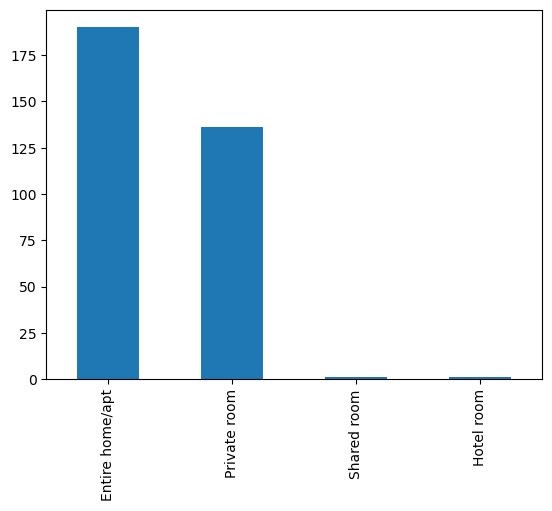

In [ ]:
#get the room type for each neighbourhood and plot it
df3.groupby('neighbourhood')['room_type'].head(10).value_counts().plot(kind='bar')


In [ ]:
#test the correlation between the price and the number of reviews
df3['price'].corr(df3['number_of_reviews'])


-0.05298536672469762

In [ ]:
df4 = pd.read_csv('neighbourhoods.csv')

In [ ]:
df4.head()

,neighbourhood_group,neighbourhood
0,NaN,Coconut Creek
1,NaN,Cooper City
2,NaN,Coral Springs
3,NaN,County Regional Facility
4,NaN,Dania Beach
